# Support Vector Machine
multi category version

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets, svm

In [5]:
# datasets
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names
labels = target_names[target]

In [8]:
setosa_pl = data[labels == 'setosa', 2]
setosa_pw = data[labels == 'setosa', 3]
setosa_p = np.c_[setosa_pl, setosa_pw]
versicolor_pl = data[labels == 'versicolor', 2]
versicolor_pw = data[labels == 'versicolor', 3]
versicolor_p = np.c_[versicolor_pl, versicolor_pw]
virginica_pl = data[labels == 'virginica', 2]
virginica_pw = data[labels == 'virginica', 3]
virginica_p = np.c_[virginica_pl, virginica_pw]

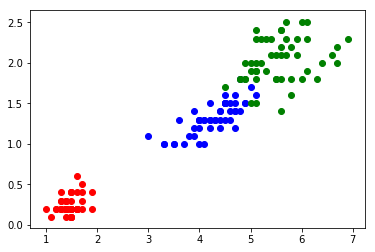

In [12]:
# visualize data
plt.scatter(setosa_p[:, 0], setosa_p[:, 1], color='red')
plt.scatter(versicolor_p[:, 0], versicolor_p[:, 1], color='blue')
plt.scatter(virginica_p[:, 0], virginica_p[:, 1], color='green')

In [13]:
# training data
x_train = np.r_[setosa_p, versicolor_p, virginica_p]
y_train = np.r_[np.zeros(len(setosa_p)),
               np.ones(len(versicolor_p)),
               np.ones(len(virginica_p))*2]

In [14]:
# define model
lsvm = svm.LinearSVC()
lsvm.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [16]:
# visualize
xx, yy = np.meshgrid(
    np.arange(x_train[:, 0].min()-1, x_train[:, 0].max()+1, 0.02),
    np.arange(x_train[:, 1].min()-1, x_train[:, 1].max()+1, 0.02),
)

In [18]:
# prediction
z = lsvm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

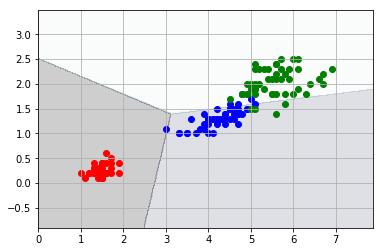

In [19]:
plt.contourf(xx, yy, z, cmap=plt.cm.bone, alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(setosa_p[:, 0], setosa_p[:, 1], color='red')
plt.scatter(versicolor_p[:, 0], versicolor_p[:, 1], color='blue')
plt.scatter(virginica_p[:, 0], virginica_p[:, 1], color='green')
plt.show()